In [18]:
import numpy as np
import matplotlib.pyplot as plt

def exp3p(d,T,eta,beta,gamma):
    e_gain = 0
    elv = 0.5*np.ones([d,2])
    elv[-2,:] = 0.4
    elv[-1,:] = [0.6,0.3]
    egv = 1-elv
    G = np.zeros([d])
    w_tilde = np.ones([d])

    for t in range(T):
        w                 = (1-gamma)*(w_tilde/np.sum(w_tilde)) + gamma/d
        adv_choice        = np.random.choice(d,p=w)
        e_gain_c          = egv[adv_choice,(2*t)//T]
        gain              = beta/w
        gain[adv_choice] += np.random.choice(2,p=[1-e_gain_c, e_gain_c])/w[adv_choice]
        e_gain           += e_gain_c
        w_tilde           = w_tilde*np.exp(eta*gain)

    return 0.6*T - e_gain

In [21]:
d = 10      #Number of advisors
T = 100000  #Number of rounds

c   = np.linspace(0.1,2.1,11)
Eta = c*np.sqrt(2.0*np.log(d)/(d*T))
n_samples=50
R   = np.zeros([11,n_samples])
for i,eta in enumerate(Eta):
    for trial in range(n_samples):
        R[i,trial] = exp3p(d,T,eta,eta,eta*d)
        print("Sample: {}, i_c:{}".format(trial,i))

Sample: 0, i_c:0
Sample: 1, i_c:0
Sample: 2, i_c:0
Sample: 3, i_c:0
Sample: 4, i_c:0
Sample: 5, i_c:0
Sample: 6, i_c:0
Sample: 7, i_c:0
Sample: 8, i_c:0
Sample: 9, i_c:0
Sample: 10, i_c:0
Sample: 11, i_c:0
Sample: 12, i_c:0
Sample: 13, i_c:0
Sample: 14, i_c:0
Sample: 15, i_c:0
Sample: 16, i_c:0
Sample: 17, i_c:0
Sample: 18, i_c:0
Sample: 19, i_c:0
Sample: 20, i_c:0
Sample: 21, i_c:0
Sample: 22, i_c:0
Sample: 23, i_c:0
Sample: 24, i_c:0
Sample: 25, i_c:0
Sample: 26, i_c:0
Sample: 27, i_c:0
Sample: 28, i_c:0
Sample: 29, i_c:0
Sample: 30, i_c:0
Sample: 31, i_c:0
Sample: 32, i_c:0
Sample: 33, i_c:0
Sample: 34, i_c:0
Sample: 35, i_c:0
Sample: 36, i_c:0
Sample: 37, i_c:0
Sample: 38, i_c:0
Sample: 39, i_c:0
Sample: 40, i_c:0
Sample: 41, i_c:0
Sample: 42, i_c:0
Sample: 43, i_c:0
Sample: 44, i_c:0
Sample: 45, i_c:0
Sample: 46, i_c:0
Sample: 47, i_c:0
Sample: 48, i_c:0
Sample: 49, i_c:0
Sample: 0, i_c:1
Sample: 1, i_c:1
Sample: 2, i_c:1
Sample: 3, i_c:1
Sample: 4, i_c:1
Sample: 5, i_c:1
Sample: 

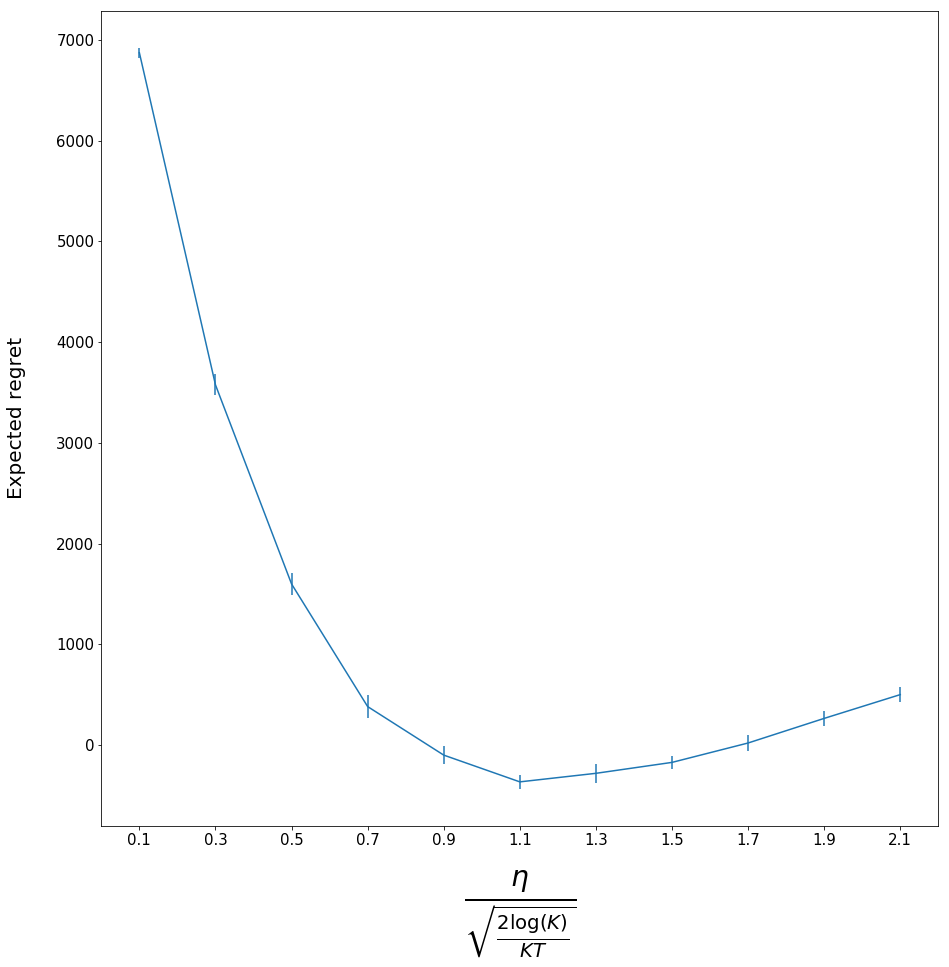

In [22]:
m, s = np.mean(R, axis=1), np.std(R, axis=1, ddof=1)*1.96/np.sqrt(50)
fig,ax = plt.subplots(figsize=(15,15))
ax.errorbar(c,m,s)
ax.set_xticks(c)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel(r"$\frac{\eta}{\sqrt{\frac{2\log(K)}{KT}}}$", fontsize=40, labelpad=20)
ax.set_ylabel(r"Expected regret", fontsize=20, labelpad=30)
ax.set_title('Expected Pseudo Regret for EXP3P', fontsize=20)
plt.savefig("q2b.png")
plt.show()

In [23]:
np.save('exp3p_r.np', R)
np.save('exp3p_c.np', c)
np.save('exp3p_eta.np', Eta)